# Computational Physics: Problem Set 4

## Exercise 1)

### The Bulirsch-Stoer method

### 8.18 Oscillating chemical reactions

/var/folders/ch/6zd8rw0j62lg36l1m378jf_m0000gp/T/ipykernel_10144/184866083.py:17: RuntimeWarning: overflow encountered in double_scalars
  fx = 1 - (b + 1)*x + a*(x**2)*y
/var/folders/ch/6zd8rw0j62lg36l1m378jf_m0000gp/T/ipykernel_10144/184866083.py:18: RuntimeWarning: overflow encountered in double_scalars
  fy = b*x - a*(x**2)*y
/var/folders/ch/6zd8rw0j62lg36l1m378jf_m0000gp/T/ipykernel_10144/184866083.py:49: RuntimeWarning: invalid value encountered in double_scalars
  error = abs(R1[n-1][0] - R1[n-2][0])
/var/folders/ch/6zd8rw0j62lg36l1m378jf_m0000gp/T/ipykernel_10144/184866083.py:43: RuntimeWarning: invalid value encountered in add
  R1[0] = 0.5*(r1 + r2 + 0.5*h*f(r2))
/var/folders/ch/6zd8rw0j62lg36l1m378jf_m0000gp/T/ipykernel_10144/184866083.py:46: RuntimeWarning: invalid value encountered in subtract
  R1[m] = R1[m-1] + (R1[m-1]-R2[m-1])/(factor - 1)


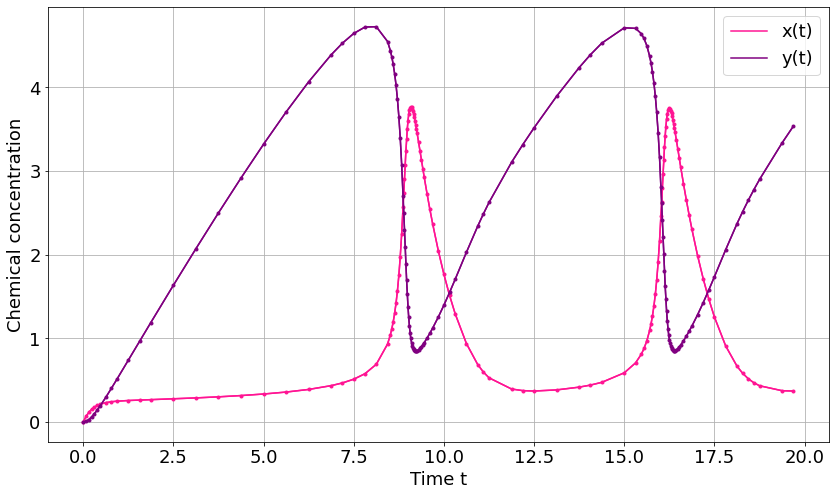

<Figure size 432x288 with 0 Axes>

In [111]:
from numpy import empty, array, arange
import matplotlib.pyplot as plt

# Parameters
a = 1.0
b = 3.0
c = 0.0
d = 20.0

H = 20.0           # initial big step size
delta = 1e-10      # required accuracy

# System of ODEs
def f(r):
    x = r[0]
    y = r[1]
    fx = 1 - (b + 1)*x + a*(x**2)*y
    fy = b*x - a*(x**2)*y
    return array([fx, fy], float)

# Recursive Bulirsch–Stoer step
def step(r, t, H):
    # Do one modified midpoint step
    r1 = r + 0.5*H*f(r)
    r2 = r + H*f(r1)
    R1 = empty([1, 2], float)
    R1[0] = 0.5*(r1 + r2 + 0.5*H*f(r2))

    # Increase n until accuracy reached
    for n in range(2, 9):
        h = H/n

        # Modified midpoint method
        r1 = r + 0.5*h*f(r)
        r2 = r + h*f(r1)
        for i in range(n-1):
            r1 += h*f(r2)
            r2 += h*f(r1)

        # Extrapolation
        R2 = R1
        R1 = empty([n, 2], float)
        R1[0] = 0.5*(r1 + r2 + 0.5*h*f(r2))
        for m in range(1, n):
            factor = (n/(n-1))**(2*m)
            R1[m] = R1[m-1] + (R1[m-1]-R2[m-1])/(factor - 1)

        # Estimate error
        error = abs(R1[n-1][0] - R1[n-2][0])
        if error < H*delta:
            # Converged: return times and states for plotting
            return [t, t+H], [r, R1[n-1]]

    # Recurse with half step if error too big
    t1, r1_path = step(r, t, H/2)
    t2, r2_path = step(r1_path[-1], t+H/2, H/2)
    # Merge the two half results, avoiding duplicate midpoint
    return t1 + t2[1:], r1_path + r2_path[1:]

# Integrate from c to d using repeated big steps
tpoints = []
xpoints = []
ypoints = []

r = array([0.0, 0.0], float)
t = c

while t < d:
    t_chunk, r_chunk = step(r, t, min(H, d-t))
    # Append to trajectory
    tpoints += t_chunk[:-1]
    xpoints += [p[0] for p in r_chunk[:-1]]
    ypoints += [p[1] for p in r_chunk[:-1]]
    # Update for next step
    t = t_chunk[-1]
    r = r_chunk[-1]
# Plot
plt.figure(figsize=(14,8))
plt.plot(tpoints, xpoints, "deeppink", label="x(t)")
plt.plot(tpoints, xpoints, "deeppink", marker='.',)
plt.plot(tpoints, ypoints, "purple", label="y(t)")
plt.plot(tpoints, ypoints, "purple", marker='.',)
plt.xlabel("Time t", fontsize=18)
plt.ylabel("Chemical concentration", fontsize=18)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.legend(fontsize=18)
plt.grid(True)
plt.show()

plt.savefig("problem_1_brusselator.png")

## Exercise 2)

### The Runge-Kutta method

### 2a) Solve ODE without dynamical friction

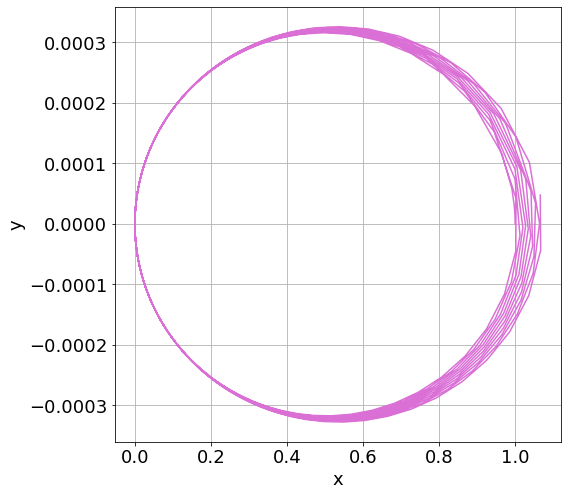

In [140]:
import numpy as np
import matplotlib.pyplot as plt

#Define important functions
#Rewrite second order ODE to first order ODEs

def derivatives(y_state, t):
    
    x, y, vx, vy = y_state
    
    r_mag_sq = x**2 + y**2
    r_mag = np.sqrt(r_mag_sq)
    r_cubed = r_mag**3
    
    ax = -x / (4.0 * r_cubed) #Acceleration (with G=M=1)
    ay = -y / (4.0 * r_cubed)
    
    return np.array([vx, vy, ax, ay])

#Function for performing one Runge-Kutta step

def rk4_step(func, y, t, h):
    k1 = h * func(y, t)
    k2 = h * func(y + 0.5 * k1, t + 0.5 * h)
    k3 = h * func(y + 0.5 * k2, t + 0.5 * h)
    k4 = h * func(y + k3, t + h)
    y_new = y + (k1 + 2*k2 + 2*k3 + k4) / 6.0
    return y_new

#Initial conditions
x0 = 1.0
y0 = 0.0
vx0 = 0.0
vy0 = np.sqrt(0.5e-7)  #approx 2.236e-4

y_current = np.array([x0, y0, vx0, vy0])

#Integration parameters
t_current = 0.0
h = 1e-6      #Initial guess for step size

#Error tolerance
d = 1e-6

#Lists to store results
times = [t_current]
y_values = [y_current]

#Orbits
orbit_count = 0

#Adaptive RK4
while orbit_count < 10:
        
    #Adaptive step
    y_half_1 = rk4_step(derivatives, y_current, t_current, h/2.0)
    y_double_step = rk4_step(derivatives, y_half_1, t_current + h/2.0, h/2.0)
    y_single_step = rk4_step(derivatives, y_current, t_current, h)
    
    #Estimate error in [x, y]
    error_x = (y_double_step[0] - y_single_step[0]) / 15.0
    error_y = (y_double_step[1] - y_single_step[1]) / 15.0
    rho = np.sqrt(error_x**2 + error_y**2)
    
    #Target error for step h
    target_error = d * h
    
    #Check if step is accepted
    if (rho < target_error or rho == 0.0):

        y_prev = y_current
        y_current = y_double_step
        t_current += h
        
        #Store results
        times.append(t_current)
        y_values.append(y_current)
        
        #Orbit counting
        # An orbit is complete when y crosses from negative to positive
        if y_prev[1] < 0 and y_current[1] >= 0:
            orbit_count += 1
            
    # Calculate optimal next step size
    # Add a tiny number to prevent division by zero
    h_opt = h * (target_error / (rho + 1e-25))**0.2
    
    # Limit step size changes (0.5x to 2.0x)
    h = min(max(h_opt, h/2.0), h*2.0) 
    
#Plot
results = np.array(y_values)

plt.figure(figsize=(8, 8))
plt.plot(results[:, 0], results[:, 1], color="orchid")
plt.xlabel("x", fontsize = 18)
plt.ylabel("y", fontsize = 18)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)

plt.grid(True)

plt.savefig("problem_2a_orbit_plot_e-5.png")

### 2b) Solve ODE with dynamical friction

Starting 2b integration (with A=1, B=1)...
Integration complete. Stopped at t = 10.76 with r = 9.99e-08


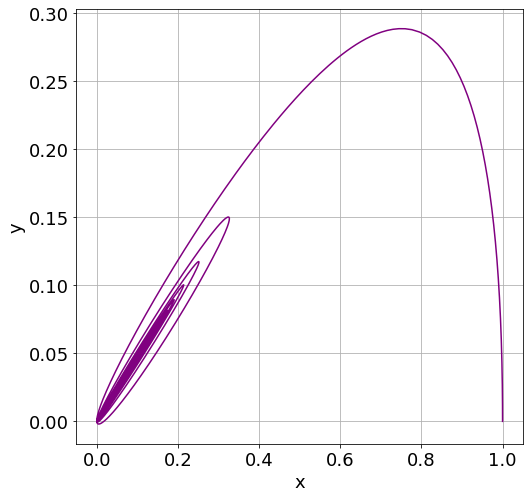

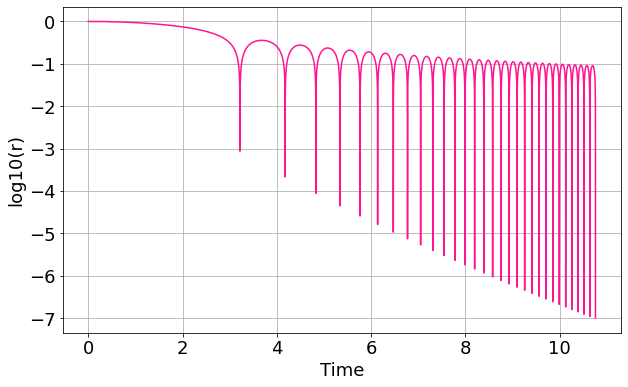

In [104]:
import numpy as np
import matplotlib.pyplot as plt

def derivatives_2(y_state, t, A, B):

    x, y, vx, vy = y_state
    
    #Gravitational term
    r_mag_sq = x**2 + y**2 + 1e-20 # Add softening
    r_mag = np.sqrt(r_mag_sq)
    r_cubed = r_mag**3
    
    a_grav_x = -x / (4.0 * r_cubed)
    a_grav_y = -y / (4.0 * r_cubed)
    
    #Dynamical friction term
    v_mag_sq = vx**2 + vy**2 + 1e-20 # Add softening
    v_mag = np.sqrt(v_mag_sq)
    v_cubed = v_mag**3
    
    df_factor = -A / (v_cubed + B)
    a_df_x = df_factor * vx
    a_df_y = df_factor * vy
    
    #Total acceleration
    ax = a_grav_x + a_df_x
    ay = a_grav_y + a_df_y
    
    return np.array([vx, vy, ax, ay])

def rk4_step(func, y, t, h, A, B):
   
    k1 = h * func(y, t, A, B)
    k2 = h * func(y + 0.5 * k1, t + 0.5 * h, A, B)
    k3 = h * func(y + 0.5 * k2, t + 0.5 * h, A, B)
    k4 = h * func(y + k3, t + h, A, B)
    y_new = y + (k1 + 2*k2 + 2*k3 + k4) / 6.0
    return y_new

#Parameters
A = 1.0
B = 1.0

#Initial conditions
x0 = 1.0
y0 = 0.0
vx0 = 0.0
vy0 = 0.4  # 0.8 * v_circ (where v_circ = 0.5)

y_current = np.array([x0, y0, vx0, vy0])
r_current = np.sqrt(x0**2 + y0**2)

#Integration parameters
t_current = 0.0
h = 0.01       # Initial guess for step size

#From 2a
delta_tolerance = 1e-9 
r_stop = 1e-7  # Schwarzschild radius

#Store results
times = [t_current]
y_values = [y_current]
r_values = [r_current]

print("Starting 2b integration (with A=1, B=1)...")

#Adaptive RK4 until r = e-7
while r_current > r_stop:
    
        
    #Adaptive step
    y_half_1 = rk4_step(derivatives_2, y_current, t_current, h/2.0, A, B)
    y_double_step = rk4_step(derivatives_2, y_half_1, t_current + h/2.0, h/2.0, A, B)
    y_single_step = rk4_step(derivatives_2, y_current, t_current, h, A, B)
    
    #Estimate error
    error_x = (y_double_step[0] - y_single_step[0]) / 15.0
    error_y = (y_double_step[1] - y_single_step[1]) / 15.0
    rho = np.sqrt(error_x**2 + error_y**2)
    
    #Target error
    target_error = delta_tolerance * h
    
    #Check if step is accepted
    if (rho < target_error or rho == 0.0):
        
        y_current = y_double_step
        t_current += h
        
        #Calculate new radius
        r_current = np.sqrt(y_current[0]**2 + y_current[1]**2)
        
        #Store results
        times.append(t_current)
        y_values.append(y_current)
        r_values.append(r_current)
            
    #Calculate optimal next step size
    h_opt = h * (target_error / (rho + 1e-25))**0.2
    
    #Limit step size changes
    h = min(max(h_opt, h/2.0), h*2.0) 
    
    if h < 1e-18:
        print(f"Error: Step size h = {h} is too small. Stopping.")
        break
        
print(f"Integration complete. Stopped at t = {t_current:.2f} with r = {r_current:.2e}")

#Prepare data
results = np.array(y_values)
times = np.array(times)
log_r_values = np.log10(np.array(r_values))

#Plot

#Orbit Path y(x)
plt.figure(figsize=(8, 8))
plt.plot(results[:, 0], results[:, 1], color="purple")
plt.xlabel("x", fontsize=18)
plt.ylabel("y", fontsize=18)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.grid(True)
plt.savefig("problem_2b_orbit.png")

#log(r) vs. time
plt.figure(figsize=(10, 6))
plt.plot(times, log_r_values, color="deeppink")
plt.xlabel("Time", fontsize=18)
plt.ylabel("log10(r)", fontsize=18)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.grid(True)
plt.savefig("problem_2b_log_r.png")

plt.show()

In [128]:
#Orbit Path y(x)
plt.figure(figsize=(8, 8))
plt.plot(results[:, 0], results[:, 1], color="purple")
plt.xlabel("x", fontsize=18)
plt.ylabel("y", fontsize=18)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.xlim(0,0.2)
plt.ylim(0,0.1)
plt.grid(True)
plt.savefig("problem_2b_orbit_zoom.png")


SyntaxError: invalid syntax (4025983383.py, line 8)

### 2c)-d) Analyzing how the time to reach r=r_s depends on A, B , v

In [141]:
import math
import numpy as np
import matplotlib.pyplot as plt
import time

USE_NUMBA = True
try:
    if USE_NUMBA:
        from numba import njit
    else:
        def njit(*args, **kwargs):
            def wrap(f): return f
            return wrap
except ImportError:
    print("Warning: Numba not found. Running in slow, pure-Python mode.")
    def njit(*args, **kwargs):
        def wrap(f): return f
        return wrap
    USE_NUMBA = False


@njit(fastmath=True)
def get_derivatives(Y, t, A, B):

    x, y, vx, vy = Y
    
    # r and v
    r2 = x*x + y*y + 1e-20  # Add sofenting term
    r = math.sqrt(r2)
    inv_r3 = 1.0 / (r*r2)
    
    v2 = vx*vx + vy*vy + 1e-20
    v = math.sqrt(v2)
    
    # Grav acc
    c = -0.25 * inv_r3
    ax_g = c * x
    ay_g = c * y

    # DF acc
    df_factor = A / (v*v2 + B) # v*v2 is v**3
    ax_df = -df_factor * vx
    ay_df = -df_factor * vy

    return np.array([vx, vy, ax_g + ax_df, ay_g + ay_df], dtype=np.float64)


@njit(fastmath=True)
def rk4_step(Y, t, h, A, B):
   
    k1 = h * get_derivatives(Y, t, A, B)
    k2 = h * get_derivatives(Y + 0.5 * k1, t + 0.5 * h, A, B)
    k3 = h * get_derivatives(Y + 0.5 * k2, t + 0.5 * h, A, B)
    k4 = h * get_derivatives(Y + k3, t + h, A, B)

    Y_new = Y + (k1 + 2*k2 + 2*k3 + k4) / 6.0
    return Y_new


@njit(fastmath=True)
def run_simulation(Y0, A, B, h0=1.0, tol=1e-7, r_stop=1e-7, max_steps=2_000_000):
 
    Y = Y0.copy()
    h = h0
    t = 0.0
    
    safety = 0.9      # Safety factor for step-size adjustment
    fac_min = 0.2     # Min factor to decrease step
    fac_max = 5.0     # Max factor to increase step
    
    step_count = 0
    
    while step_count < max_steps:
        # Check stop condition
        r_now = math.hypot(Y[0], Y[1])
        if r_now <= r_stop:
            return t # Success!
            
        # Adaptive step
        # One full step
        Y_full = rk4_step(Y, t, h, A, B)
        
        # Two half-steps
        Y_half_1 = rk4_step(Y, t, h*0.5, A, B)
        Y_half_2 = rk4_step(Y_half_1, t + h*0.5, h*0.5, A, B)
        
        # Errir
        # Difference between full and two half-steps
        err_x = Y_half_2[0] - Y_full[0]
        err_y = Y_half_2[1] - Y_full[1]
        err = math.hypot(err_x, err_y)
        
        # Calculate target error
        target_error = tol * h
        
        if err == 0.0:
            fac = fac_max
        else:
            fac = safety * (target_error / err) ** 0.25

        # Accept or Reject Step
        if err < target_error:
            # Accept step (use 2-half-step)
            Y = Y_half_2
            t += h
            step_count += 1
            
            # Increase next step size
            h *= min(fac, fac_max)
        else:
            # Reject step
            # Decrease step size, clamped
            h *= max(fac, fac_min)
            
        if h < 1e-12: # Prevent h from becoming too small
             return t
             
    return t


if __name__ == "__main__":
    
    print("Running simulations...")
    if USE_NUMBA:
        print("Using Numba JIT acceleration.")
    
    #Constants
    V_CIRC = 0.5 # At r=1
    TIME_CONVERSION_MYR = 1.5
    R_STOP = 1e-7

    #Initial Conditions
    x0, y0 = 1.0, 0.0
    vx0, vy0 = 0.0, 0.8 * V_CIRC # Use 0.8 * v_circ as per 2b
    Y0 = np.array([x0, y0, vx0, vy0], dtype=np.float64)

    #Grid
    A_vals = np.linspace(0.5, 10, 10)
    B_vals = np.linspace(0.5, 10, 10)
    tf_array = np.zeros((len(A_vals), len(B_vals)))

    start_time = time.time()

    for i, A in enumerate(A_vals):
        for j, B in enumerate(B_vals):
            tf = run_simulation(
                Y0, A, B,
                h0=1.0,       #Initial step size
                tol=1e-7,     #Error tolerance
                r_stop=R_STOP
            )
            tf_array[j, i] = tf #Store time in (row, col) -> (B, A)
        print(f"  Finished A = {A:.2f} (row {i+1}/10)")
        
    end_time = time.time()
    print(f"Simulations complete in {end_time - start_time:.2f} seconds.")
    
    #Convert to Myr
    tf_array_myr = tf_array * TIME_CONVERSION_MYR


Running simulations...
Using Numba JIT acceleration.
  Finished A = 0.50 (row 1/10)
  Finished A = 1.56 (row 2/10)
  Finished A = 2.61 (row 3/10)
  Finished A = 3.67 (row 4/10)
  Finished A = 4.72 (row 5/10)
  Finished A = 5.78 (row 6/10)
  Finished A = 6.83 (row 7/10)
  Finished A = 7.89 (row 8/10)
  Finished A = 8.94 (row 9/10)
  Finished A = 10.00 (row 10/10)
Simulations complete in 134.43 seconds.


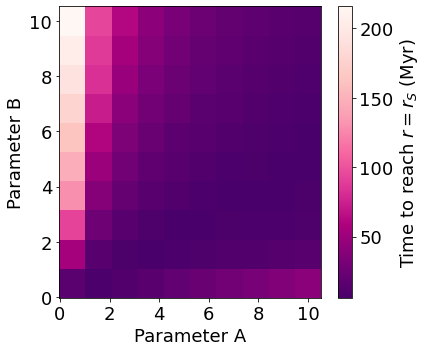

In [136]:
    plt.figure(figsize=(6, 5))
    
    #2D plot
    plt.pcolormesh(
        A_vals, 
        B_vals, 
        tf_array_myr, 
        shading='auto', 
        cmap='RdPu_r'
    )
    
    plt.xlabel("Parameter A", fontsize=18)
    plt.ylabel("Parameter B", fontsize=18)
    plt.xticks(fontsize = 18)
    plt.yticks(fontsize = 18)
    
    
    cbar = plt.colorbar()
    cbar.set_label("Time to reach $r=r_S$ (Myr)", fontsize=18)
    cbar.ax.tick_params(labelsize=18)


    plt.tight_layout()
    plt.savefig("problem_2c_plot.png")
    plt.show()